In [1]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np

### Creating a new dataset using sklearn's 'make_classification' and converting it into a pandas DataFrame

In [2]:
x,y = make_classification(n_samples = 10000, n_classes= 2, n_features = 2, n_informative = 2, 
                          n_redundant= 0, n_clusters_per_class= 1, random_state = 60);

#print(type(x));print(y)

df = pd.DataFrame(data= x, columns = ['f1', 'f2'])
df['class'] = y
print(df.shape)
df.head(7)

(10000, 3)


,f1,f2,class
0,0.994448,-1.516667,0
1,-0.340479,-0.395461,1
2,-0.929780,-1.448549,1
3,1.726444,-2.539542,0
4,-1.956264,-1.538624,1
5,0.747555,-0.211740,0
6,-1.228424,-1.218711,1


### Splitting the data into Test and Train datasets

In [23]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.85)
x_test

,f1,f2
3708,-1.152894,-0.933505
5256,1.293606,-1.882777
5306,-0.906401,-1.029627
778,-0.932280,-1.163214
5260,-0.468672,-0.604207
...,...,...
6561,-0.393818,-0.671385
5905,0.716803,-0.945135
6517,1.049959,-0.729947
1732,0.473624,-0.657756


In [4]:
print("Shape of Training dataset",x_train.shape);print(y_train.shape)
print("shape of Test dataset", x_test.shape);print(y_test.shape)

Shape of Training dataset (8500, 2)
(8500,)
shape of Test dataset (1500, 2)
(1500,)


In [5]:
import matplotlib.pyplot as plt
import seaborn as sb
from warnings import filterwarnings
filterwarnings(action = 'ignore')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


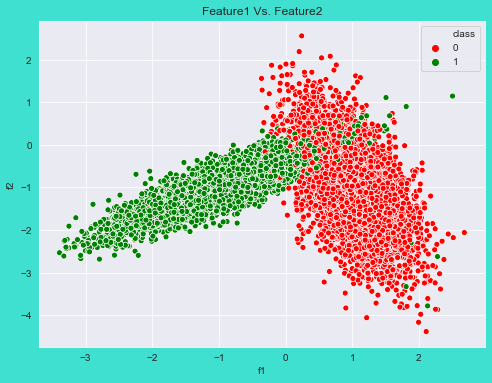

In [77]:
plt.figure(figsize = (8,6), facecolor= 'turquoise')
plt.title("Feature1 Vs. Feature2")
sb.scatterplot(x = df['f1'], y = df['f2'], hue = df['class'], palette = ['Red', 'Green'])
sb.set_style("darkgrid")
plt.show()

### The Grid Search CV implementation !

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import random

In [55]:
def GridSearch(x_train, y_train, classifier, folds, hyperparameters):
    all_cv_accuracy = []
    all_train_accuracy = []
    
    for k in hyperparameters:
        fold_test_acc = []
        fold_train_acc = []
        
        for i in range(0, len(hyperparameters)):
            train_indices = generate_train_data_for_kfold(x_train)
            test_indices = list(set(list(range(1, len(x_train)))) - set(train_indices))
            
#             print(x_train.shape)
#             print(y_train.shape)
#             print(x_test.shape)
#             print(y_test.shape)
#             print(len(train_indices))
#             print(len(test_indices))
            
            
            x_new_train = x_train[train_indices]
            y_new_train = y_train[train_indices]
            x_new_test = x_train[test_indices]
            y_new_test = y_train[test_indices]
            
            classifier.n_neighbors = k
            classifier.fit(x_new_train, y_new_train)
            
            y_train_prediction = classifier.predict(x_new_train)
            fold_train_acc.append(accuracy_score(y_new_train, y_train_prediction))
            
            y_test_prediction = classifier.predict(x_new_test)
            fold_test_acc.append(accuracy_score(y_new_test, y_test_prediction))
            
        all_train_accuracy.append(np.mean(np.array(fold_train_acc)))
        all_cv_accuracy.append(np.mean(np.array(fold_test_acc)))
        
    
    return all_cv_accuracy, all_train_accuracy
            
def generate_train_data_for_kfold(x_train):
    return random.sample(range(0, len(x_train)), int(0.6 * len(x_train)))

clf = KNeighborsClassifier()
parameters = [3,5,7,9,11,13,15,17,19,21,23]

x_train = np.array(x_train)
y_train = np.array(y_train)

train_score, test_score = GridSearch(x_train, y_train, clf, 3, parameters)

print("Training Score: ", train_score);print("\n")
print("Test Score: ", test_score)

Training Score:  [0.948548031585257, 0.9535217656026546, 0.9550219473169995, 0.9552089557639633, 0.9568402471315093, 0.957692424478417, 0.9577470725111035, 0.9569472304688545, 0.9584681952697632, 0.9567298340342316, 0.9574831225918914]


Test Score:  [0.9683600713012477, 0.9627629233511587, 0.9611586452762925, 0.9618360071301246, 0.9608199643493762, 0.9598930481283422, 0.9593048128342244, 0.9598752228163993, 0.9583600713012479, 0.9591087344028519, 0.9585561497326203]


### Finding the optimal 'K' !

In [81]:
max_acc_index = np.argsort(test_score)[-1]
optimal_k = parameters[max_acc_index]
print("Best Value of K: {} that gave a test accuracy of {}%".format(optimal_k, test_score[max_acc_index]))


Best Value of K: 3 that gave a test accuracy of 0.9683600713012477%


### Plotting the Hyperparameter Vs. Accuracy Curve

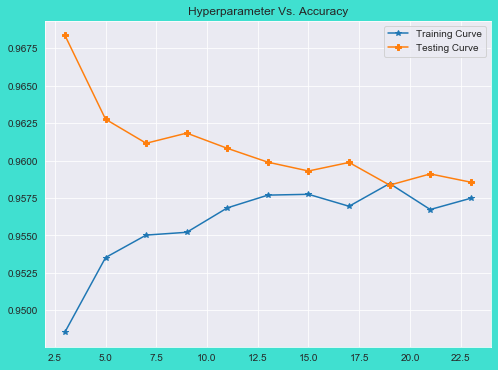

In [80]:
plt.figure(figsize = (8,6), facecolor = 'turquoise')
sb.set_style("darkgrid")
plt.plot(parameters, train_score, "*-", label = "Training Curve")
plt.plot(parameters, test_score, "P-", label = "Testing Curve")
plt.legend()
plt.title("Hyperparameter Vs. Accuracy")
plt.show()